
# Deep Learning for Image Classification 



## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [5]:
x_train[0].shape

(28, 28)

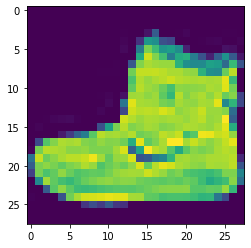

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0]

9

In [8]:
classes[9]

'Ankle boot'

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
x_train.max()

255

In [10]:
x_train = x_train/255

In [11]:
x_test = x_test/255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [14]:
x_test = x_test.reshape(10000,28,28,1) # 10,000 data, 28X28 image size, 1 channel (since it's black and white)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train # our classes are now integer

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_cat_train = to_categorical(y_train) # here we are converting category

In [18]:
y_cat_test = to_categorical(y_test)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [20]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))
model.add(Flatten()) # we vectorize
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))  # to prevent overfitting
model.add(Dense(10, activation='softmax')) # softmax for multi-classification

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy']) # categorical_crossentropy for multi-classification

In [21]:
from tensorflow.keras.callbacks import EarlyStopping 
# to avoid too much epoch if there is no improvement in model training
# also to combat overfitting

In [22]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 3) 
# accuracy makes sense to follow because if accuracy doesn't increase, loss won't decrease 

In [23]:
model.fit(x_train, y = y_cat_train, validation_data=(x_test,y_cat_test), batch_size = 32, epochs = 10, verbose = 1,
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.4200 - accuracy: 0.8559 - val_loss: 0.3235 - val_accuracy: 0.8875
Epoch 2/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3020 - accuracy: 0.8963 - val_loss: 0.3161 - val_accuracy: 0.8870
Epoch 3/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2838 - accuracy: 0.9029 - val_loss: 0.3089 - val_accuracy: 0.8918
Epoch 4/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.2757 - accuracy: 0.9042 - val_loss: 0.3025 - val_accuracy: 0.8983
Epoch 5/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.2741 - accuracy: 0.9066 - val_loss: 0.3087 - val_accuracy: 0.8985
Epoch 6/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.2713 - accuracy: 0.9071 - val_loss: 0.3340 - val_accuracy: 0.8923
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.2681 - accuracy: 0.9096 - val_loss: 0.3175 -

In [24]:
loss_df = pd.DataFrame(model.history.history) # let's visualize it to see if it's overfitting
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.419966,0.855933,0.323469,0.8875
1,0.301952,0.896283,0.316087,0.8870
2,0.283787,0.902867,0.308926,0.8918
3,0.275720,0.904183,0.302467,0.8983
4,0.274144,0.906633,0.308701,0.8985


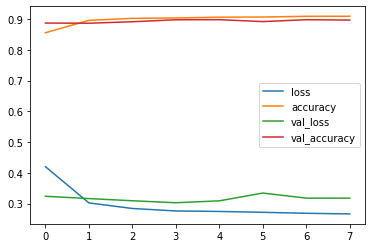

In [25]:
loss_df.plot(); # looks like model is not overfit

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3175 - accuracy: 0.8972


[0.3174537718296051, 0.8971999883651733]

In [28]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict(x_test) # gives the probabilities of the relevant class
predictions

array([[4.3347441e-08, 1.6344392e-12, 4.3192369e-08, ..., 1.8348725e-04,
        5.3214774e-07, 9.9974781e-01],
       [3.1809581e-08, 5.4250154e-23, 1.0000000e+00, ..., 1.1721244e-14,
        2.0106848e-14, 3.9491980e-22],
       [1.1595063e-09, 1.0000000e+00, 1.1982893e-11, ..., 2.6907285e-13,
        3.6472500e-12, 2.3058034e-13],
       ...,
       [1.2295127e-10, 1.1211882e-27, 2.5371520e-14, ..., 1.2509934e-15,
        1.0000000e+00, 1.3537896e-19],
       [5.8843623e-09, 9.9999654e-01, 5.9184202e-10, ..., 8.1349920e-11,
        7.7242740e-10, 1.4517779e-09],
       [5.6837923e-03, 6.7605922e-04, 3.9118048e-02, ..., 5.4817784e-01,
        4.5180347e-02, 3.6507905e-02]], dtype=float32)

In [30]:
preds=np.argmax(predictions,axis=1)
preds
# [4.3347441e-08, 1.6344392e-12, 4.3192369e-08, ..., 1.8348725e-04,5.3214774e-07, 9.9974781e-01] 
# Returns the index of the highest probability value in, that is, returns the class number

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

In [31]:
y_cat_test.shape

(10000, 10)

In [32]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [33]:
np.argmax(predictions[0])

9

In [34]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [35]:
print(classification_report(y_test,preds)) 
# We are comparing two int values in classification_report, attention not category
# 7 and above predict grades well
# 2,3 v3 4 mixes classes

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.85      0.83      1000
           3       0.92      0.87      0.90      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.96      0.97      1000
           6       0.74      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [36]:
classes[6]

'Shirt'

## Prediction

In [37]:
samples=[x_test[19],x_test[15],x_test[12],x_test[14]]

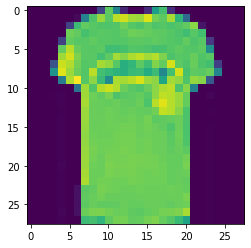

In [38]:
plt.imshow(samples[0])

In [39]:
samples[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.20392157],
        [0.75294118],
        [0.45098039],
        [0.10588235],
        [0.00392157],
        [0.00392157],
        [0.12156863],
        [0.56078431],
        [0.70196078],
        [0.1254902 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01960784],
        [0.44313725],
        [0.7254902 ],
        [0.84705882],
        [0.74509804],
        [0.89803922],
        [0.92941176],
        [0.8627451 ],
        [0.85098039],
        [0.94901961],
        [0.78823529],
        

In [40]:
img=samples[0]
img.shape

(28, 28, 1)

In [41]:
type(img)

numpy.ndarray

In [42]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape 
# pieces, image size, number of channels
# expand_dims image shape adds 1 to neither axis=0
# kerasa image we can export like this

(1, 28, 28, 1)

In [43]:
model.predict(resized_img) # gives the class probabilities for a single t-shirt image above

array([[9.8994815e-01, 7.6748474e-09, 8.1589603e-04, 9.2260634e-05,
        7.0403178e-07, 1.4769973e-08, 9.1400556e-03, 6.0390692e-09,
        2.8899924e-06, 7.9039449e-12]], dtype=float32)

In [44]:
np.argmax(model.predict(resized_img)) # guessed that the t-shirt belongs to class 0, the model guessed right

0

In [45]:
classes[0]

'T-shirt/top'

In [46]:

for img in samples:
    resized_img=np.expand_dims(img, axis=0)
    print(pd.Series(model.predict(resized_img).flatten(), index = classes).round(3))
    print(f"predicted class is : {classes[np.argmax(model.predict(resized_img))]}\n")
    

T-shirt/top    0.990
Trouser        0.000
Pullover       0.001
Dress          0.000
Coat           0.000
Sandal         0.000
Shirt          0.009
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : T-shirt/top

T-shirt/top    0.0
Trouser        1.0
Pullover       0.0
Dress          0.0
Coat           0.0
Sandal         0.0
Shirt          0.0
Sneaker        0.0
Bag            0.0
Ankle boot     0.0
dtype: float32
predicted class is : Trouser

T-shirt/top    0.000
Trouser        0.000
Pullover       0.000
Dress          0.000
Coat           0.000
Sandal         0.154
Shirt          0.000
Sneaker        0.243
Bag            0.603
Ankle boot     0.000
dtype: float32
predicted class is : Bag

T-shirt/top    0.000
Trouser        0.000
Pullover       0.147
Dress          0.000
Coat           0.813
Sandal         0.000
Shirt          0.039
Sneaker        0.000
Bag            0.000
Ankle boot     0.000
dtype: float32
predicted class is : Coat



# real life photo

(275, 183, 3)


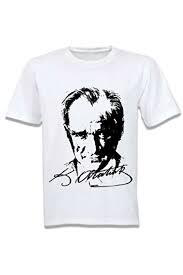

In [47]:
from tensorflow.keras.preprocessing import image
imgGray = image.load_img("test.jfif")
print (np.array(imgGray).shape)
imgGray # 275 e 183 pixels 3 channel image

In [48]:
import tensorflow as tf
imgGray = tf.image.rgb_to_grayscale(imgGray) # we converted a single channel image

In [49]:
imgGray

<tf.Tensor: shape=(275, 183, 1), dtype=uint8, numpy=
array([[[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]]], dtype=uint8)>

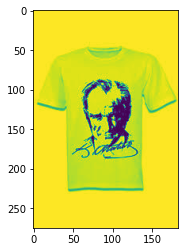

In [50]:
plt.imshow(imgGray)

In [51]:
np.array(imgGray).min(), np.array(imgGray).max() 

(0, 255)

In [52]:
imgGray = np.resize(imgGray/255, (28, 28,1)) # we both resize and scale
imgGray.shape

(28, 28, 1)

In [53]:
imgGray

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
  

In [54]:
imgGray = np.array(imgGray) # converted to array
imgGray.shape

(28, 28, 1)

In [55]:
imgGray= np.expand_dims(imgGray, axis=0) # we add dimension, that is, the row information
imgGray.shape

(1, 28, 28, 1)

In [56]:
# imgGray = imgGray[None,:,:,:] # same process to add dimension without a function
# imgGray.shape

In [57]:
model.predict(imgGray).round(3).argmax()

8

In [58]:
classes[8]

'Bag'